<a href="https://colab.research.google.com/github/hwan1111/Data-Analysis/blob/main/finance-project/factor-analysis/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국내외 주식시장 팩터 분석 프로젝트

최근 투자 업계에서는 데이터 기반의 팩터 전략이 주목받고 있다. 글로벌 자산운용사들은 팩터 이론을 활용한 ETF 및 액티브 펀드를 지속적으로 출시하고 있으며, 개인 투자자들도 팩터 기반 투자 전략에 많은 관심을 보이고 있다.\
\
본 프로젝트에서는 yfinance API, pykrx API를 활용해 한국 및 미국 시장에 상장된 종목들의 시세 및 재무 데이터를 수집하고, 대표적인 팩터(가치, 모멘텀, 퀄리티, 로우볼, 사이즈)를 기준으로 데이터를 분석 및 시각화한다.\
데이터는 다음과 같이 수집된다.
- **한국 시장**: `pykrx`를 통해 KOSPI/KOSDAQ 종목 가격 및 투자지표(PER, PBR 등)를 수집
- **미국 시장**: `yfinance`를 통해 미국상장 종목 일별 가격 및 재무 데이터 수집

각 팩터는 다음과 같은 기준으로 정의된다:
- **가치(Value)**: PBR 또는 PER 기준 하위 종목
- **모멘텀(Momentum)**: 최근 3-6개월 수익률 상위 종목
- **퀄리티(Quality)**: ROE 및 안정적 이익 성장률 기반 종목
- **로우볼(Low Volatility)**: 변동성이 낮은 종목
- **사이즈(Size)**: 시가총액이 작은 종목

이 프로젝트의 주요 목표는 다음과 같다.
- yfinance 및 pykrx를 활용한 종목별 데이터 자동 수집
- 시세 및 재무데이터 전처리를 포함한 빅데이터 처리 역량 강화
- 팩터별 종목 분류 및 그룹 수익률 분석
- 시각화를 통한 팩터의 성과 차이를 직관적으로 파악
- 투자 전략 수립을 위한 기초 자료 제공


> 본 프로젝트는 실시간 데이터 분석보다는, 일정 기간의 히스토리컬 데이터를 기준으로 팩터별 특성과 수익룰을 비교하는 데 중점을 두었습니다. 향후 웹소켓 방식을 채택해 실시간성을 추가해볼 예정입니다.

![팩터투자 개념 이미지](https://www.kcie.or.kr/webbook_img?file=webbook/MjAxODEyMjBfOSAg/MDAxNTQ1Mjg3MDY2NDk3.ExJspUcIBudCjG--rYpNVnrKcqn20ei1lykK6P8skaEg.VSIsM1CYg7XiQoz_nFXQSCKkpAurvcAnky4GcG5EOsog.PNG/2.png)

[이미지 출처: 요즘 떠오르는 팩터투자&스마트베타ETF 쉽게 알아가기](https://www.kcie.or.kr/mobile/guide/3/18/web_view?series_idx=&content_idx=387)

# 1. 데이터 수집 및 전처리

이 프로젝트에서는 pykrx API, yfinance API를 통해 한국/미국 주식의 일별 시세와 주요 재무 지표를 수집한다. 수집된 데이터는 향후 팩터 정의 및 백테스트에 활용된다.

## 1.0 필요라이브러리 설치 및 마운트

In [ ]:
!pip3 install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 12.6 MB/s eta 0:00:00


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import tqdm

from pykrx import stock as pkstock
from pykrx import bond as pkbond
import yfinance

## 1.1 종목 리스트 수집

In [ ]:
market = 'KOSPI'

tickers = pkstock.get_market_ticker_list(market=market)

tickers

['095570',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000480',
 '000590',
 '012030',
 '005830',
 '016610',
 '000990',
 '000300',
 '001530',
 '015590',
 '000210',
 '000215',
 '375500',
 '37550L',
 '37550K',
 '007340',
 '004840',
 '155660',
 '069730',
 '017860',
 '092780',
 '017940',
 '365550',
 '383220',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '078935',
 '499790',
 '012630',
 '039570',
 '089470',
 '294870',
 '009540',
 '267250',
 '267270',
 '443060',
 '071970',
 '010620',
 '322000',
 '042670',
 '267260',
 '329180',
 '097230',
 '014790',
 '003580',
 '204320',
 '060980',
 '011200',
 '035000',
 '002460',
 '487570',
 '298050',
 '003560',
 '015360',
 '175330',
 '234080',
 '001060',
 '001067',
 '001065',
 '096760',
 '105560',
 '415640',
 '432320',
 '002380',
 '344820',
 '009070',
 '009440',
 '119650',
 '092220',
 '003620',
 '016380',
 '001390',

In [ ]:
len(tickers)

962

2025년 7월 1일자로 코스피에 총 962개의 종목이 상장되어있다.

### 데이터 저장 및 구조화 전략

팩터 분석에는 종목 수와 분석 기간 모두 많은 데이터를 필요하므로, 시계열 데이터 저장 방식에 따라 성능과 효율성이 크게 달라진다.\
본 프로젝트에서는 다음과 같은 점을 고려해 데이터를 **long format**으로 정규화하였으며, 이를 `.parquet`포맷으로 저장해 효율적인 로딩과 분석이 가능하도록 설계하였다.

- 정규화된 테이블 구조는 그룹 분석, 결측 처리, 수익률 계산 등 다양한 연산에 적합
- Parquet 포맷은 용량을 줄이고 불필요한 컬럼 로딩을 줄여 분석 속도를 향상시킴
- 필요시 DuckDB나 SQLite를 통한 쿼리 기반 분석 확장 가능성 고려

데이터 저장 시 `date`와 `ticker`를 복합 기본키(PK)로 설정함으로써, 각 종목의 일별 데이터를 유일하게 식별하고 분석 효율성을 높였다. 이러한 구조는 시계열 분석, 팩터 계산, 그룹별 수익률 분석 등 다양한 분석 작업에서 높은 일관성과 확장성을 제공할 수 있다.



## 1.2 가격 데이터 추출


pykrx의 `get_market_ohlcv()` 함수는 두 가지 방식(`by_date`, `by_ticker`)으로 데이터를 제공하며, 각 방식마다 포함된 컬럼에 차이가 있다.  
본 프로젝트에서는 일별 시계열 분석이 중심이므로 `get_market_ohlcv_by_date()`를 기반으로 데이터를 수집하되, 등락률은 종가 기준 수익률로 계산하여 대체하였다. 이는 수집 속도를 높이면서도 팩터 분석에 필요한 정보는 충분히 확보할 수 있는 실용적인 전략이다.

```
# 1. 날짜 설정
end = datetime.today()
start = end - timedelta(days=365)
start_str = start.strftime('%Y%m%d')
end_str = end.strftime('%Y%m%d')

# 2. 종목 리스트
tickers = pkstock.get_market_ticker_list(market="KOSPI")

# 3. 결과 저장 리스트
all_data = []

# 4. 종목별 수집
for ticker in tqdm(tickers, desc="종목별 수집"):
    try:
        df = pkstock.get_market_ohlcv_by_date(start_str, end_str, ticker).reset_index()
        df['종목코드'] = ticker
        df['종목명'] = pkstock.get_market_ticker_name(ticker)

        # 등락률 계산: 하루 전 대비 종가 수익률
        df['등락률'] = df['종가'].pct_change() * 100  # 백분율 (%)

        # 필요한 컬럼 정리
        df = df[[
            '날짜',
            '종목코드',
            '종목명',
            '종가',
            '등락률'
        ]]
        all_data.append(df)

    except Exception as e:
        print(f"[{ticker}] 에러 발생: {e}")

# 5. 하나로 합치기
df_all = pd.concat(all_data, ignore_index=True)
df_all['날짜'] = pd.to_datetime(df_all['날짜'])

# 6. 저장
df_all.to_parquet("kospi_ohlcv_with_return.parquet")
# 또는 CSV 저장
# df_all.to_csv("kospi_ohlcv_with_return.csv", index=False)

print(f"\n 저장 완료! 총 {len(df_all):,} rows")
```


#### update_kospi_ohlcv(filepath="kospi_ohlcv_with_return.parquet")

In [ ]:
def update_kospi_ohlcv(filepath="kospi_ohlcv_with_return.parquet"):
    today = datetime.today().date()
    yesterday = today - timedelta(days=1)
    yesterday_str = yesterday.strftime('%Y%m%d')

    # 기존 데이터 로드
    if os.path.exists(filepath):
        df_all = pd.read_parquet(filepath)
        print(f"OHLCV 기존 파일 로드됨: {len(df_all):,} rows")

        latest_date = df_all['날짜'].max().date()
        if latest_date >= yesterday:
            print("이미 최신 데이터까지 포함되어 있음.")
            return df_all
        start = latest_date + timedelta(days=1)
    else:
        df_all = pd.DataFrame()
        start = today - timedelta(days=365)

    start_str = start.strftime('%Y%m%d')

    # 종목 리스트
    tickers = pkstock.get_market_ticker_list(market="KOSPI")
    all_data = []

    for ticker in tqdm(tickers, desc=f"종목별 OHLCV 수집"):
        try:
            df = pkstock.get_market_ohlcv_by_date(start_str, yesterday_str, ticker).reset_index()
            if df.empty:
                continue

            df['종목코드'] = ticker
            df['종목명'] = pkstock.get_market_ticker_name(ticker)

            df = df[[
                '날짜',
                '종목코드',
                '종목명',
                '종가'
            ]]

            all_data.append(df)
        except Exception as e:
            print(f"[{ticker}] 에러 발생: {e}")

    if not all_data:
        print("수집된 데이터 없음.")
        return df_all

    df_new = pd.concat(all_data, ignore_index=True)
    df_new['날짜'] = pd.to_datetime(df_new['날짜'])

    # 기존과 병합 후 중복 제거
    df_all = pd.concat([df_all, df_new], ignore_index=True)
    df_all.drop_duplicates(subset=['날짜', '종목코드'], keep='last', inplace=True)

    # 등락률 재계산
    df_all.sort_values(['종목코드', '날짜'], inplace=True)
    df_all['등락률'] = df_all.groupby('종목코드')['종가'].pct_change() * 100

    df_all.sort_index(inplace=True)

    # 저장
    df_all.to_parquet(filepath)
    print(f"{yesterday}까지 반영 완료. 총 {len(df_all):,} rows 저장됨.")

    return df_all

본 프로젝트에서는 종목과 날짜 정보를 기반으로 정규화된 long-format 테이블을 구축했다. 이는 하나의 통합된 구조에서 다양한 분석 목적에 유연하게 대응할 수 있도록 설계한 것으로, 데이터 저장 방식부터 모델 학습 구조까지 일관성을 확보하는 데 중점을 두었다.

특히 long-format 구조는 머신러닝 기반 분류/회귀 모델과 시계열 딥러닝 모델 모두에 적합한 전처리 기반을 제공한다. 예를 들어, 전 종목 데이터를 통합한 상태에서는 feature engineering과 벡터화된 입력 구성이 용이하며, 종목별 시계열 데이터를 분리하면 순차 입력 기반의 딥러닝 모델에 효과적으로 활용할 수 있다.

또한, 데이터 저장 및 조회의 효율성을 고려해 SQL 기반 접근을 병행했다. 리밸런싱 시점 분석과 같이 특정 날짜에 전체 종목을 조회하는 경우에는 날짜 기준인덱싱을, 개별 종목의 시계열 특성을 분석하거나 입력 데이터로 사용할 경우에는 티커 기준 인덱싱을 활용함으로써 쿼리 성능과 분석 유연석을 동시에 확보했다.

## 1.3 재무재표 데이터 추출

```
# 1. 날짜 설정
end = datetime.today()
start = end - timedelta(days=365)
start_str = start.strftime('%Y%m%d')
end_str = end.strftime('%Y%m%d')

# 2. 종목 리스트
tickers = pkstock.get_market_ticker_list(market="KOSPI")

# 3. 결과 저장 리스트
all_data = []

# 4. 종목별 수집
for ticker in tqdm(tickers, desc="종목별 수집"):
    try:
        df = pkstock.get_market_fundamental_by_date(start_str, end_str, ticker).reset_index()
        df['종목코드'] = ticker
        df['종목명'] = pkstock.get_market_ticker_name(ticker)

        # 필요한 컬럼 정리
        df = df[[
            '날짜',
            '종목코드',
            '종목명',
            'BPS',
            'PER',
            'PBR',
            'EPS',
            'DIV',
            'DPS'
        ]]
        all_data.append(df)

    except Exception as e:
        print(f"[{ticker}] 에러 발생: {e}")

# 5. 하나로 합치기
df_all = pd.concat(all_data, ignore_index=True)
df_all['날짜'] = pd.to_datetime(df_all['날짜'])

# 6. 저장
df_all.to_parquet("kospi_fundamental_with_return.parquet")
# 또는 CSV 저장
# df_all.to_csv("kospi_fundamental_with_return.csv", index=False)

print(f"\n 저장 완료! 총 {len(df_all):,} rows")
```

```
종목별 수집:   4%|▍         | 38/962 [01:06<21:03,  1.37s/it][365550] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:   8%|▊         | 81/962 [02:22<19:35,  1.33s/it][415640] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:   9%|▊         | 82/962 [02:23<15:15,  1.04s/it][432320] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  14%|█▎        | 131/962 [03:42<16:11,  1.17s/it][400760] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  14%|█▍        | 134/962 [03:46<14:05,  1.02s/it][338100] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  17%|█▋        | 165/962 [04:34<15:27,  1.16s/it][395400] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  38%|███▊      | 370/962 [09:59<10:51,  1.10s/it][377190] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  39%|███▉      | 376/962 [10:07<10:59,  1.12s/it][330590] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  41%|████      | 390/962 [10:26<10:24,  1.09s/it][357430] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  41%|████      | 392/962 [10:28<08:48,  1.08it/s][088980] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  41%|████      | 393/962 [10:28<06:55,  1.37it/s][094800] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  43%|████▎     | 409/962 [10:54<12:36,  1.37s/it][396690] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  43%|████▎     | 410/962 [10:55<09:41,  1.05s/it][357250] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  46%|████▋     | 447/962 [11:49<09:24,  1.10s/it][448730] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  56%|█████▌    | 536/962 [14:07<08:24,  1.18s/it][204210] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  58%|█████▊    | 557/962 [14:38<07:16,  1.08s/it][481850] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  58%|█████▊    | 558/962 [14:38<05:38,  1.19it/s][404990] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  58%|█████▊    | 559/962 [14:39<04:47,  1.40it/s][293940] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  62%|██████▏   | 596/962 [15:41<07:18,  1.20s/it][140910] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  63%|██████▎   | 607/962 [15:57<07:34,  1.28s/it][900140] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  69%|██████▊   | 660/962 [17:30<07:45,  1.54s/it][088260] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  70%|██████▉   | 670/962 [17:46<06:00,  1.23s/it][350520] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  70%|██████▉   | 671/962 [17:46<04:35,  1.05it/s][334890] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  73%|███████▎  | 699/962 [18:29<05:19,  1.22s/it][348950] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  77%|███████▋  | 744/962 [19:39<05:22,  1.48s/it][145270] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  77%|███████▋  | 745/962 [19:39<04:02,  1.12s/it][417310] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  78%|███████▊  | 746/962 [19:39<03:21,  1.07it/s][357120] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  84%|████████▍ | 812/962 [21:18<03:01,  1.21s/it][950210] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  86%|████████▌ | 823/962 [21:34<02:37,  1.13s/it][152550] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집:  93%|█████████▎| 895/962 [23:24<01:21,  1.22s/it][451800] 에러 발생: "None of [Index(['날짜', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')] are in the [columns]"
종목별 수집: 100%|██████████| 962/962 [25:13<00:00,  1.57s/it]
 저장 완료! 총 224,401 rows
```

#### update_kospi_fundamental(filepath='kospi_fundamental_with_return.parquet', json_path='excluded_tickers.json')

In [ ]:
EXCLUDED_TICKERS = {
    '365550', '415640', '432320', '400760', '338100',
    '395400', '377190', '330590', '357430', '088980',
    '094800', '396690', '357250', '448730', '204210',
    '481850', '404990', '293940', '140910', '900140',
    '088260', '350520', '334890', '348950', '145270',
    '417310', '357120', '950210', '152550', '451800'
}

In [ ]:
def update_kospi_fundamental(
        filepath='kospi_fundamental_with_return.parquet',
        json_path='excluded_tickers.json'):

    with open(json_path, 'r') as file:
        EXCLUDED_TICKERS = set(json.load(file)['excluded_tickers'])

    today = datetime.today().date()
    yesterday = today - timedelta(days=1)
    yesterday_str = yesterday.strftime('%Y%m%d')

    # 기존 데이터 로드
    if os.path.exists(filepath):
        df_all = pd.read_parquet(filepath)
        print(f"Fundamental 기존 파일 로드됨: {len(df_all):,} rows")

        latest_date = df_all['날짜'].max().date()
        if latest_date >= yesterday:
            print('이미 최신 데이터까지 포함되어 있음.')
            return df_all
        start = latest_date + timedelta(days=1)
    else:
        df_all = pd.DataFrame()
        start = today - timedelta(days=365)

    start_str = start.strftime('%Y%m%d')

    # 종목 리스트
    tickers = pkstock.get_market_ticker_list(market='KOSPI')
    all_data = []

    for ticker in tqdm(tickers, desc=f'종목별 재무재표 수집'):
        try:
            if ticker in EXCLUDED_TICKERS:
                continue

            df = pkstock.get_market_fundamental_by_date(start_str, yesterday_str, ticker).reset_index()
            if df.empty:
                continue

            df['종목코드'] = ticker
            df['종목명'] = pkstock.get_market_ticker_name(ticker)

            df = df[[
                '날짜',
                '종목코드',
                '종목명',
                'BPS',
                'PER',
                'PBR',
                'EPS',
                'DIV',
                'DPS'
            ]]
            all_data.append(df)
        except Exception as e:
            print(f'[{ticker}] 에러 발생: {e}')

    if not all_data:
        print('수집된 데이터 없음.')
        return df_all

    df_new = pd.concat(all_data, ignore_index=True)
    df_new['날짜'] = pd.to_datetime(df_new['날짜'])

    # 병합 및 저장
    df_all = pd.concat([df_all, df_new], ignore_index=True)
    df_all.drop_duplicates(subset=['날짜', '종목코드'], keep='last', inplace=True)
    df_all.to_parquet(filepath)

    print(f"{yesterday_str}까지 반영 완료. 총 {len(df_all):,} rows → {filepath}")
    return df_all

재무지표 수집 과정에서 리츠(REITs), 우선주, 스팩(SPAC), 지분증권 등 일반 상장 기업과 다른 회계 구조를 가지거나, 재무지표가 공시되지 않는 비표준 종목들이 다수 존재하였다. 이러한 종목은 PER, PBR, EPS 등의 주요 팩터 산출 지표가 존재하지 않거나 의미가 없기 때문에, 본 프로젝트에서는 해당 종목들을 사전 필터링을 통해 분석 대상에서 제외하였다.

에러를 유발하는 비표준 종목 목록은 JSON 파일 형태로 별도로 관리하여 코드와 데이터 정의를 분리하였다. 이를 통해 코드 수정 없이 제외 종목을 관리할 수 있으며, 다른 분석 스크립트에서도 동일한 기준을 재사용할 수 있도록 하여 유지보수성과 일관성을 높였다.

## 1.4 시가총액 데이터 추출

```
# 1. 날짜 설정
end = datetime.today()
start = end - timedelta(days=365)
start_str = start.strftime('%Y%m%d')
end_str = end.strftime('%Y%m%d')

# 2. 종목 리스트
tickers = pkstock.get_market_ticker_list(market="KOSPI")

# 3. 결과 저장 리스트
all_data = []

# 4. 종목별 수집
for ticker in tqdm(tickers, desc="종목별 수집"):
    try:
        df = pkstock.get_market_cap_by_date(start_str, end_str, ticker).reset_index()
        df['종목코드'] = ticker
        df['종목명'] = pkstock.get_market_ticker_name(ticker)

        # 필요한 컬럼 정리
        df = df[[
            '날짜',
            '종목코드',
            '종목명',
            '시가총액',
            '거래량',
            '거래대금'
        ]]
        all_data.append(df)

    except Exception as e:
        print(f"[{ticker}] 에러 발생: {e}")

# 5. 하나로 합치기
df_all = pd.concat(all_data, ignore_index=True)
df_all['날짜'] = pd.to_datetime(df_all['날짜'])

# 6. 저장
df_all.to_parquet("kospi_marketcap_with_return.parquet")
# 또는 CSV 저장
# df_all.to_csv("kospi_ohlcv_with_return.csv", index=False)

print(f"\n 저장 완료! 총 {len(df_all):,} rows")
```

#### update_kospi_marketcap(filepath="kospi_marketcap_with_return.parquet")

In [ ]:
def update_kospi_marketcap(filepath="kospi_marketcap_with_return.parquet"):
    today = datetime.today().date()
    yesterday = today - timedelta(days=1)
    yesterday_str = yesterday.strftime('%Y%m%d')

    # 기존 데이터 로드
    if os.path.exists(filepath):
        df_all = pd.read_parquet(filepath)
        print(f'MarketCap 기존 파일 로드됨: {len(df_all)}: rows')

        latest_date = df_all['날짜'].max().date()
        if latest_date >= yesterday:
            print('이미 최신 데이터까지 포함되어 있음')
            return df_all
        start = latest_date + timedelta(days=1)
    else:
        df_all = pd.DataFrame()
        start = today - timedelta(days=365)

    start_str = start.strftime('%Y%m%d')

    # 종목 리스트
    tickers = pkstock.get_market_ticker_list(market='KOSPI')
    all_data = []

    for ticker in tqdm(tickers, desc='종목별 시가총액 수집'):
        try:
            df = pkstock.get_market_cap_by_date(start_str, yesterday_str, ticker).reset_index()
            if df.empty:
                continue

            df['종목코드'] = ticker
            df['종목명'] = pkstock.get_market_ticker_name(ticker)

            df = df[[
                '날짜',
                '종목코드',
                '종목명',
                '시가총액',
                '거래량',
                '거래대금'
            ]]

            all_data.append(df)
        except Exception as e:
            print(f'[{ticker}] 에러 발생: {e}')

    if not all_data:
        print('수집된 데이터 없음.')
        return df_all

    df_new = pd.concat(all_data, ignore_index=True)
    df_new['날짜'] = pd.to_datetime(df_new['날짜'])

    # 병합 및 저장
    df_all = pd.concat([df_all, df_new], ignore_index=True)
    df_all.drop_duplicates(subset=['날짜', '종목코드'], keep='last', inplace=True)
    df_all.to_parquet(filepath)

    print(f"{yesterday_str}까지 반영 완료. 총 {len(df_all):,} rows → {filepath}")
    return df_all

## 1.5 업종(섹터) 데이터 추출

업종(섹터) 데이터는 `pykrx`에서는 추출하지 못하는 점 때문에 본 프로젝트에서는 KRX 정보데이터시스템의 '업종분류 현황' 데이터를 활용해 각 종목의 업종(섹터) 정보를 매핑하였다. 해당 파일에는 티커별로 속한 업종명이 포함되어 있다.

업종 정보는 향후 다음과 같은 분석에 활용할 수 있다.
- **섹터 내 정규화**: 재무지표를 업종 내 상대적 기준으로 스케일링 할 수 있음
- **섹터 기반 팩터 분석**: 업종 특성에 따라 팩터 효과가 다르게 나타나는지를 평가
- **포트폴리오 분산 투자 전략**: 업종 분산을 고려한 자산 배분 가능

In [ ]:
def update_kospi_sector(csv_path='업종분류 현황.csv'):
    df_sector = pd.read_csv(csv_path, encoding='euc-kr')
    df_sector['종목코드'] = df_sector['종목코드'].astype(str).str.zfill(6)
    return df_sector

## 1.6 통합 데이터프레임 구성

#### update_kospi()

In [ ]:
def update_kospi():
    price_df = update_kospi_ohlcv()
    fundamental_df = update_kospi_fundamental()
    marketcap_df = update_kospi_marketcap()
    sector_df = update_kospi_sector()

    merge_df = pd.merge(
        price_df,
        sector_df[['종목코드', '업종명']],
        on=['종목코드'],
        how='left'
    )

    merge_df = pd.merge(
        merge_df,
        fundamental_df.drop(columns=['종목명']),
        on=['날짜', '종목코드'],
        how='left'
    )

    merge_df = pd.merge(
        merge_df,
        marketcap_df.drop(columns=['종목명']),
        on=['날짜', '종목코드'],
        how='left'
    )

    cols = ['날짜', '종목코드', '종목명', '업종명', '종가',
            '등락률', '시가총액', '거래량', '거래대금',
            'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']

    return merge_df[cols]

In [ ]:
df = update_kospi()
df.head()

OHLCV 기존 파일 로드됨: 230,611 rows


종목별 OHLCV 수집: 100%|██████████| 962/962 [04:19<00:00,  3.71it/s]


2025-07-03까지 반영 완료. 총 231,573 rows 저장됨.
Fundamental 기존 파일 로드됨: 223,481 rows


종목별 재무재표 수집: 100%|██████████| 962/962 [02:53<00:00,  5.54it/s]


20250703까지 반영 완료. 총 224,413 rows → kospi_fundamental_with_return.parquet
MarketCap 기존 파일 로드됨: 230611: rows


종목별 시가총액 수집: 100%|██████████| 962/962 [02:51<00:00,  5.60it/s]


20250703까지 반영 완료. 총 231,573 rows → kospi_marketcap_with_return.parquet


,날짜,종목코드,종목명,업종명,종가,등락률,시가총액,거래량,거래대금,BPS,PER,PBR,EPS,DIV,DPS
0,2024-07-03,095570,AJ네트웍스,일반서비스,4325,NaN,195718182675,172857,751087580,9326.0,11.78,0.46,367.0,6.24,270.0
1,2024-07-04,095570,AJ네트웍스,일반서비스,4355,0.693642,197075765445,88181,380902455,9326.0,11.87,0.47,367.0,6.20,270.0
2,2024-07-05,095570,AJ네트웍스,일반서비스,4375,0.459242,197980820625,109637,483212730,9326.0,11.92,0.47,367.0,6.17,270.0
3,2024-07-08,095570,AJ네트웍스,일반서비스,4465,2.057143,202053568935,104014,463397405,9326.0,12.17,0.48,367.0,6.05,270.0
4,2024-07-09,095570,AJ네트웍스,일반서비스,4440,-0.559910,200922249960,78035,346864710,9326.0,12.10,0.48,367.0,6.08,270.0


## 1.7 결측치 처리 및 전처리

### 결측치 처리

통합된 시세, 재무재표, 시가총액 데이터프레임에서 결측치가 많은 종목을 식별하고, 이후 분석 신뢰도를 높이기 위한 사전 정제 작업을 수행했다.

- ticker 기준으로 그룹화해 각 열의 결측치 개수를 집계
- 종목별 총 결측치 수를 기준으로 결측치 비중이 큰 종목을 파악
- 단일 팩터 분석 시 해당 팩터에 한정해 결측치를 고려할 수 있도록 설계

In [ ]:
na_count = df.groupby('종목코드').apply(lambda g: g.isna().sum(), include_groups=False)

na_count['총결측치'] = na_count.sum(axis=1)
na_count_sorted = na_count.sort_values('총결측치', ascending=False)

na_count_sorted.head(40)

,날짜,종목명,업종명,종가,등락률,시가총액,거래량,거래대금,BPS,PER,PBR,EPS,DIV,DPS,총결측치
종목코드,,,,,,,,,,,,,,,
432320,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
417310,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
404990,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
400760,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
396690,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
395400,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
377190,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
365550,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447
357430,0,0,0,0,1,0,0,0,241,241,241,241,241,241,1447


In [ ]:
def drop_nan(df, excluded_tickers_path='excluded_tickers.json'):
    with open(excluded_tickers_path) as file:
        excluded_tickers = set(json.load(file)['excluded_tickers'])

    df = df[~df['종목코드'].isin(excluded_tickers)].reset_index(drop=True)
    df['등락률'] = df['등락률'].fillna(0)
    return df

df = drop_nan(df)
df

,날짜,종목코드,종목명,업종명,종가,등락률,시가총액,거래량,거래대금,BPS,PER,PBR,EPS,DIV,DPS
0,2024-07-03,095570,AJ네트웍스,일반서비스,4325,0.000000,195718182675,172857,751087580,9326.0,11.78,0.46,367.0,6.24,270.0
1,2024-07-04,095570,AJ네트웍스,일반서비스,4355,0.693642,197075765445,88181,380902455,9326.0,11.87,0.47,367.0,6.20,270.0
2,2024-07-05,095570,AJ네트웍스,일반서비스,4375,0.459242,197980820625,109637,483212730,9326.0,11.92,0.47,367.0,6.17,270.0
3,2024-07-08,095570,AJ네트웍스,일반서비스,4465,2.057143,202053568935,104014,463397405,9326.0,12.17,0.48,367.0,6.05,270.0
4,2024-07-09,095570,AJ네트웍스,일반서비스,4440,-0.559910,200922249960,78035,346864710,9326.0,12.10,0.48,367.0,6.08,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224408,2025-07-03,079980,휴비스,화학,3200,2.564103,110400000000,64037,203442395,7140.0,0.00,0.45,0.0,0.00,0.0
224409,2025-07-03,005010,휴스틸,금속,4830,3.870968,271388402250,747096,3561002332,19927.0,12.17,0.24,397.0,3.11,150.0
224410,2025-07-03,000540,흥국화재,보험,4280,-1.947308,274958520600,141196,611375110,11857.0,2.93,0.36,1459.0,0.00,0.0
224411,2025-07-03,000545,흥국화재우,보험,7300,2.384292,5606400000,10985,80755200,0.0,0.00,0.00,0.0,0.00,0.0


통합된 데이터프레임의 결측치를 분석한 결과, 대부분은 스팩(SPAC), 리츠(REITs) 등 특수 증권에 대한 재무지표 누락과 각 티커별 시계열에서 첫 번째 관측일의 등락률 결측으로 나타났다. 특수 증권은 재무 데이터 수집의 한계로 인해 분석 대상에서 제외하였고, 첫 번째 등락률 결측은 계산 불가능성에 기인한 것으로 판단되어 0으로 대체하였다. 이는 실제 수익률이 존재하지 않는 시점에서 발생한 결측으로, 정보 왜곡 없이 분석 및 모델 학습에 포함시키기에 적절하다고 판단하였다.

### 정규화

- 종가
    - 전처리 방식: MinMaxScaler
    - 그룹 기준: 종목코드
    - 이유: 주식의 가격 수준은 종목마다 크게 다르며, 절대적인 가격 자체는 모델에 큰 의미가 없고 변동성 또는 패턴이 더 중요하다고 생각했다. 따라서 종목별로 최저가최고가 구간을 0-1사이로 정규화함으로써 각 종목의 상대적인 가격 흐름에 집중할 수 있도록 하였다. MinMaxScaler는 시계열 분석 시 원래의 형태를 유지하면서 범위를 조정하는 데 유리해 선택하였다.

- 시가총액
    - 전처리 방식: log변환 후 MinMaxScaler
    - 그룹 기준: 전체 혹은 섹터
    - 이유: 시가총액은 종목 간 편차가 매우 크며, 대형주의 비중이 과도하게 반영될 수 있다. 로그 변환을 통해 분포를 안정화하고, 정규화를 통해 모델이 규모 차이에 과도하게 영향을 받지 않도록 조정했다.

- 거래량, 거래대금
    - 전처리 방식: log1p 변환 후 RobustScaler
    - 그룹 기준: 종목코드
    - 이유: 거래량과 거래대금은 극단적인 이상치를 자주 포함하는 특성이다. 로그 변환으로 스케일을 줄이고, 중앙값 기반의 RobustScaler를 적용해 이상치의 영향을 최소화하였다.

- 재무 지표(PER, EPS)
    - 전처리 방식: Z-Score 표준화 또는 RobustScaler
    - 그룹 기준: 섹터
    - 이유: 두 지표 모두 이익을 기반한 수치로, 음수일 수 있으며, 이상치의 분포가 심하다(예: 적자기업). PER는 주가 대비 수익률을 EPS는 주당순이익을 의미하지만 둘 다 수익성 관련 지표이므로 함께 처리할 수 있다. 평균과 표준편차 기반의 Z-Score를 사용하여 스케일을 맞추되, 이상치가 많은 경우에는 중앙값 기반의 RobustScaler를 사용해 안정적으로 정규화하였다.

- 재무 지표(PBR)
    - 전처리 방식: RobustScaler
    - 그룹 기준: 종목 코드
    - 이유: PBR은 주가 대비 자산가치를 나타내는 지표로, 업종에 따라 평균 수준이 매우 다르며 극단적인 고평가/저평가 구간이 자주 발생한다. 평균보다는 중앙값 기준 정규화가 더 적절하다고 판단해 RobustScaler를 적용하였다.

- 재무 지표(BPS)
    - 전처리 방식: Z-Score 표준화
    - 그룹 기준: 종목 코드
    - 이유: BPS(주당순자산)는 절대값이 크고, 규모가 큰 기업일수록 수치가 크다. EPS와는 달리 음수보다는 편차가 큰 양의 수가 대부분이므로, 이상치가 적고 Z-Score 표준화로도 안정적으로 정규화 가능.

- 재무 지표(DIV, DPS)
    - 전처리 방식: MinMaxScaler
    - 그룹 기준: 전체 혹은 섹터
    - 이유: 배당지표들은 대부분 0에 가깝고, 특정 종목만 값이 존재하는 경우가 많다. 분포가 매우 치우쳐 있어 로그 변환보다는 0-1 사이로 스케일을 맞추는 방식이 더 적합하다고 판단. DIV(배당수익률), DPS(주당배당금)는 보조지표로 사용되며, 모델에 직접적으로 큰 영향을 미치지 않도록 범위만 조정하였다.
    

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def make_scaled_df(df):
    # 종가: 종목코드별 MinMax 정규화
    df['종가_scaled'] = df.groupby('종목코드')['종가'].transform(
        lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )

    # 시가총액: 업종명별 로그 + MinMax 정규화
    df['시가총액_sector_scaled'] = df.groupby('업종명')['시가총액'].transform(
        lambda x: MinMaxScaler().fit_transform(np.log1p(x.values).reshape(-1, 1)).flatten()
    )

    # 시가총액: 전체 로그 + MinMax 정규화
    df['시가총액_scaled'] = MinMaxScaler().fit_transform(
        np.log1p(df['시가총액']).values.reshape(-1, 1)
    ).flatten()

    # 거래량: 전체 로그 + Robust 정규화
    df['거래량_scaled'] = RobustScaler().fit_transform(
        np.log1p(df['거래량']).values.reshape(-1, 1)
    ).flatten()

    # 거래대금: 종목코드별 로그 + MinMax 정규화
    df['거래대금_scaled'] = df.groupby('종목코드')['거래대금'].transform(
        lambda x: MinMaxScaler().fit_transform(np.log1p(x.values).reshape(-1, 1)).flatten()
    )

    # PER: 업종명별 Robust 정규화
    df['PER_sector_scaled'] = df.groupby('업종명')['PER'].transform(
        lambda x: RobustScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )

    # EPS: 업종명별 Robust 정규화
    df['EPS_sector_scaled'] = df.groupby('업종명')['EPS'].transform(
        lambda x: RobustScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )

    # PBR: 종목코드별 Robust 정규화
    df['PBR_sector_scaled'] = df.groupby('종목코드')['PBR'].transform(
        lambda x: RobustScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )

    # BPS: 종목코드별 Standard 정규화
    df['BPS_sector_scaled'] = df.groupby('종목코드')['BPS'].transform(
        lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )

    # DIV, DPS: 전체 MinMax 정규화
    df['DIV_scaled'] = MinMaxScaler().fit_transform(df[['DIV']])
    df['DPS_scaled'] = MinMaxScaler().fit_transform(df[['DPS']])

    return df

In [ ]:
scaled_df = make_scaled_df(df)
scaled_df

,날짜,종목코드,종목명,업종명,종가,등락률,시가총액,거래량,거래대금,BPS,...,시가총액_sector_scaled,시가총액_scaled,거래량_scaled,거래대금_scaled,PER_sector_scaled,EPS_sector_scaled,PBR_sector_scaled,BPS_sector_scaled,DIV_scaled,DPS_scaled
0,2024-07-03,095570,AJ네트웍스,일반서비스,4325,0.000000,195718182675,172857,751087580,9326.0,...,0.390958,0.364845,0.384421,0.559773,0.280285,-0.161221,0.000000,-0.451642,0.251918,0.010000
1,2024-07-04,095570,AJ네트웍스,일반서비스,4355,0.693642,197075765445,88181,380902455,9326.0,...,0.392028,0.365401,0.148597,0.366756,0.287411,-0.161221,0.125000,-0.451642,0.250303,0.010000
2,2024-07-05,095570,AJ네트웍스,일반서비스,4375,0.459242,197980820625,109637,483212730,9326.0,...,0.392737,0.365770,0.224901,0.434389,0.291370,-0.161221,0.125000,-0.451642,0.249092,0.010000
3,2024-07-08,095570,AJ네트웍스,일반서비스,4465,2.057143,202053568935,104014,463397405,9326.0,...,0.395888,0.367408,0.206454,0.422486,0.311164,-0.161221,0.250000,-0.451642,0.244247,0.010000
4,2024-07-09,095570,AJ네트웍스,일반서비스,4440,-0.559910,200922249960,78035,346864710,9326.0,...,0.395019,0.366956,0.105770,0.340146,0.305622,-0.161221,0.250000,-0.451642,0.245458,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224408,2025-07-03,079980,휴비스,화학,3200,2.564103,110400000000,64037,203442395,7140.0,...,0.371866,0.318769,0.036503,0.403109,-0.446988,-0.321146,1.571429,-2.214145,0.000000,0.000000
224409,2025-07-03,005010,휴스틸,금속,4830,3.870968,271388402250,747096,3561002332,19927.0,...,0.463755,0.391149,0.897269,0.379451,0.869231,0.075666,0.000000,2.214145,0.125555,0.005556
224410,2025-07-03,000540,흥국화재,보험,4280,-1.947308,274958520600,141196,611375110,11857.0,...,0.494234,0.392201,0.313535,0.488378,-0.093151,-0.014573,5.000000,-2.214145,0.000000,0.000000
224411,2025-07-03,000545,흥국화재우,보험,7300,2.384292,5606400000,10985,80755200,0.0,...,0.061457,0.078946,-0.581152,0.740320,-0.895890,-0.233774,0.000000,0.000000,0.000000,0.000000


# 2. 탐색적 데이터 분석(EDA)

탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 수집하고 전처리한 데이터를 바탕으로, 데이터의 분포, 특성, 관계 등을 시각화와 통계적 방법을 통해 탐색하는 과정이다. EDA의 목적은 다음과 같다:

1. **데이터 이해**
   - 변수별 분포, 범위, 이상치 등을 파악하여 데이터의 전반적인 구조를 이해

2. **패턴 및 관계 탐색**
   - 변수 간의 상관관계나 숨겨진 패턴을 찾아 향후 모델링에 필요한 인사이트를 확보

3. **이상치 및 노이즈 탐지**
   - 분석에 부정적인 영향을 줄 수 있는 이상값이나 노이즈 데이터를 식별하고 처리 방안을 고려

4. **가설 수립**
   - 데이터에 기반한 직관적 통찰을 통해, 이후 분석 및 모델링에서 검증할 수 있는 가설을 수립

5. **모델링 전 변수 선택**
   - 예측 성능에 중요한 영향을 미칠 수 있는 변수들을 사전에 선별하여 효율적인 모델을 설계

EDA는 단순한 시각화 작업을 넘어서, 데이터 분석의 방향성과 전략을 결정짓는 핵심적인 단계이다.

## 2.1 데이터 이해

In [ ]:
df_price_factor = scaled_df[[
    '종목코드', '종목명', '업종명',
    '종가_scaled', '시가총액_sector_scaled',
    '시가총액_scaled'
]]

df_fundamental_factor = scaled_df[[
    '종목코드', '종목명', '업종명',
    'PER_sector_scaled', 'EPS_sector_scaled',
    'PBR_sector_scaled', 'BPS_sector_scaled',
    'DIV_scaled', 'DPS_scaled'
]]

df_marketcap_factor = scaled_df[[
    '종목코드', '종목명', '업종명',
    '거래량_scaled', '거래대금_scaled'
]]

In [ ]:
df_price_factor.groupby('업종명').describe()[[
    '시가총액_sector_scaled', '시가총액_scaled'
]]

시가총액_sector_scaled                                               \
                         count      mean       std  min       25%       50%   
업종명                                                                           
IT 서비스                  6119.0  0.458121  0.258802  0.0  0.228968  0.439588   
건설                      8990.0  0.466537  0.223691  0.0  0.370865  0.456842   
금속                     15665.0  0.422974  0.164754  0.0  0.314551  0.400696   
기계·장비                   7810.0  0.457058  0.203037  0.0  0.308276  0.402293   
기타금융                   22221.0  0.497359  0.228041  0.0  0.365286  0.480925   
기타제조                    1928.0  0.584606  0.252760  0.0  0.342695  0.614741   
농업, 임업 및 어업              482.0  0.509988  0.401338  0.0  0.109718  0.531896   
보험                      3207.0  0.655574  0.224275  0.0  0.585859  0.640130   
부동산                      723.0  0.668373  0.313287  0.0  0.482318  0.808073   
비금속                     6025.0  0.605453  0.228302  0.0  0.528607  0.632510   
섬유·의류                   7471.0  0.395529  0.198830  0.0  0.216272  0.374182   
오락·문화                   3374.0  0.443066  0.230265  0.0  0.223520  0.382750   
운송·창고                   6507.0  0.374698  0.250929  0.0  0.167525  0.349469   
운송장비·부품                15424.0  0.386262  0.242598  0.0  0.204933  0.287898   
유통                     17269.0  0.411414  0.191240  0.0  0.256304  0.394397   
은행                       723.0  0.618539  0.395762  0.0  0.085689  0.882003   
음식료·담배                 11568.0  0.486556  0.210668  0.0  0.361366  0.468030   
의료·정밀기기                 1928.0  0.577290  0.246584  0.0  0.394102  0.597409   
일반서비스                   8676.0  0.504610  0.232792  0.0  0.338357  0.466728   
전기·가스                   2410.0  0.273456  0.274018  0.0  0.024009  0.206282   
전기·전자                  19262.0  0.421147  0.190823  0.0  0.273039  0.402545   
제약                     13014.0  0.437871  0.179629  0.0  0.361009  0.423076   
종이·목재                   4820.0  0.622604  0.181468  0.0  0.536775  0.644554   
증권                      6989.0  0.482851  0.223262  0.0  0.307831  0.478269   
통신                      1205.0  0.613222  0.357795  0.0  0.258992  0.768479   
화학                     29671.0  0.476714  0.183177  0.0  0.368293  0.457101   

                           시가총액_scaled                                \
                  75%  max       count      mean       std       min   
업종명                                                                    
IT 서비스       0.676054  1.0      6119.0  0.471303  0.159014  0.189822   
건설           0.589847  1.0      8990.0  0.314070  0.150587  0.000000   
금속           0.502196  1.0     15665.0  0.360380  0.124304  0.041255   
기계·장비        0.623794  1.0      7810.0  0.389277  0.153918  0.042791   
기타금융         0.653209  1.0     22221.0  0.425021  0.169816  0.054651   
기타제조         0.791248  1.0      1928.0  0.325947  0.081156  0.138242   
농업, 임업 및 어업  0.907530  1.0       482.0  0.272211  0.071514  0.181338   
보험           0.754758  1.0      3207.0  0.508983  0.162336  0.034461   
부동산          0.895271  1.0       723.0  0.309630  0.052287  0.198081   
비금속          0.750088  1.0      6025.0  0.315344  0.117453  0.003861   
섬유·의류        0.500743  1.0      7471.0  0.315987  0.089607  0.137734   
오락·문화        0.596710  1.0      3374.0  0.404067  0.123539  0.166358   
운송·창고        0.494163  1.0      6507.0  0.393603  0.144960  0.177143   
운송장비·부품      0.504025  1.0     15424.0  0.397921  0.168653  0.129393   
유통           0.542531  1.0     17269.0  0.369174  0.129677  0.090200   
은행           0.901296  1.0       723.0  0.593010  0.139127  0.375568   
음식료·담배       0.627710  1.0     11568.0  0.355197  0.149137  0.010752   
의료·정밀기기      0.786679  1.0      1928.0  0.396738  0.086803  0.193518   
일반서비스        0.646224  1.0      8676.0  0.423940  0.121044  0.161559   
전기·가스        0.312255  1.0      2410.0  0.432245  0.123042  0.309455   
전기·전자        0.534822  1.0     19262.0  0.426382  0.189097  0.00

In [ ]:
df_fundamental_factor.groupby('업종명').describe()

PER_sector_scaled                                             \
                        count       mean         std       min       25%   
업종명                                                                        
IT 서비스                 6119.0   0.521110    2.958963 -0.752137 -0.465483   
건설                     8990.0   2.148612   10.694844 -0.254187 -0.254187   
금속                    15665.0   1.162628    3.788944 -0.301832 -0.301832   
기계·장비                  7810.0   0.956110    2.479992 -0.309571 -0.309571   
기타금융                  22221.0  19.111735  178.123864 -0.516648 -0.516648   
기타제조                   1928.0   0.446724    1.078284 -0.239049 -0.239049   
농업, 임업 및 어업             482.0  -0.018478    0.472041 -0.534842 -0.534842   
보험                     3207.0   0.232050    1.011470 -0.895890 -0.317808   
부동산                     723.0  19.690653   81.664411 -0.607143 -0.607143   
비금속                    6025.0   1.599394    7.958715 -0.566480 -0.566480   
섬유·의류                  7471.0   0.454517    2.354380 -0.488302 -0.488302   
오락·문화                  3374.0   1.284588    8.532692 -0.222907 -0.222907   
운송·창고                  6507.0   0.354353    1.578604 -0.840722 -0.433498   
운송장비·부품               15424.0   5.913762   31.617669 -0.492108 -0.291459   
유통                    17269.0   1.021254    4.398777 -0.368651 -0.368651   
은행                      723.0   0.199953    0.472551 -0.224970 -0.217623   
음식료·담배                11568.0   1.338735   13.139107 -0.522928 -0.522928   
의료·정밀기기                1928.0   1.461907    3.343271 -0.466886 -0.278083   
일반서비스                  8676.0   0.394525    1.597874 -0.651614 -0.651614   
전기·가스                  2410.0   0.164550    0.697459 -0.700573 -0.332378   
전기·전자                 19262.0   1.746251   13.368741 -0.293583 -0.293583   
제약                    13014.0   1.263849    4.348841 -0.333039 -0.333039   
종이·목재                  4820.0   0.749779    2.185478 -0.331385 -0.331385   
증권                     6989.0   0.891280    2.706855 -0.516274 -0.516274   
통신                     1205.0   0.182895    1.229924 -0.728070 -0.728070   
화학                    29671.0   0.477530    1.936546 -0.446537 -0.446537   

                                                 EPS_sector_scaled            \
                      50%       75%          max             count      mean   
업종명                                                                            
IT 서비스       0.000000e+00  0.534517    35.982249            6119.0  0.412799   
건설           0.000000e+00  0.745813    92.962562            8990.0  1.079764   
금속           0.000000e+00  0.698168    30.679846           15665.0  1.388038   
기계·장비        0.000000e+00  0.690429    16.222315            7810.0  0.816316   
기타금융         0.000000e+00  0.483352  2257.424799           22221.0  0.629644   
기타제조         0.000000e+00  0.760951     4.839242            1928.0  1.781817   
농업, 임업 및 어업 -5.551115e-17  0.465158     0.719476             482.0 -0.307609   
보험           0.000000e+00  0.682192     6.895890            3207.0  0.951507   
부동산          0.000000e+00  0.392857   389.273810             723.0  0.134054   
비금속          0.000000e+00  0.433520    49.074860            6025.0  0.297102   
섬유·의류        0.000000e+00  0.511698    23.479304            7471.0  0.460392   
오락·문화        1.387779e-17  0.777093    85.692308            3374.0  0.626101   
운송·창고        0.000000e+00  0.566502    11.266010            6507.0  0.954731   
운송장비·부품      0.000000e+00  0.708541   417.670054           15424.0  1.637967   
유통           0.000000e+00  0.631349    61.452715           17269.0  2.113422   
은행           0.000000e+00  0.782377     1.406800             723.0  0.191108   
음식료·담배       0.000000e+00  0.477072   244.106195           11568.0  0.687376   
의료·정밀기기     -4.336809e-17  0.721917    19.698012            1928.0  0.592337   
일반서비스       -7.036472e-17  0.348386     7.890275            8676.0  0.764534   
전기·가스        0.000000e+00  0.667622     2.36103

In [ ]:
df_marketcap_factor.groupby('업종명').describe()

거래량_scaled                                                    \
                 count      mean       std       min       25%       50%   
업종명                                                                        
IT 서비스          6119.0  0.269889  0.550168 -1.992681 -0.043285  0.247140   
건설              8990.0 -0.272437  1.148645 -3.839862 -0.830290 -0.176200   
금속             15665.0 -0.116892  0.982508 -3.839862 -0.584042  0.024444   
기계·장비           7810.0  0.187773  1.101134 -3.839862 -0.116130  0.389842   
기타금융           22221.0 -0.244716  0.858239 -3.839862 -0.727646 -0.140742   
기타제조            1928.0 -0.204553  0.865417 -3.839862 -0.761939 -0.021807   
농업, 임업 및 어업      482.0 -0.583238  0.285926 -1.345221 -0.782755 -0.602886   
보험              3207.0  0.271259  0.590886 -3.839862  0.044593  0.380922   
부동산              723.0  0.176363  0.614019 -3.839862 -0.199978 -0.021538   
비금속             6025.0 -0.297419  0.784037 -3.839862 -0.736693 -0.280940   
섬유·의류           7471.0 -0.349340  1.053529 -3.839862 -0.920893 -0.174069   
오락·문화           3374.0 -0.000657  1.204246 -3.839862 -0.183283  0.264559   
운송·창고           6507.0 -0.002441  1.156444 -3.839862 -0.428573  0.153771   
운송장비·부품        15424.0  0.044750  0.970778 -3.839862 -0.322736  0.116062   
유통             17269.0 -0.199335  1.076261 -3.839862 -0.491767 -0.013401   
은행               723.0  0.741217  0.385488 -0.211493  0.493278  0.819670   
음식료·담배         11568.0 -0.375721  0.838030 -3.839862 -0.855091 -0.310510   
의료·정밀기기         1928.0  0.323576  0.533066 -3.839862 -0.005000  0.326688   
일반서비스           8676.0 -0.078047  0.672456 -3.212192 -0.495500 -0.047076   
전기·가스           2410.0 -0.215082  0.828384 -1.994482 -0.817591 -0.397870   
전기·전자          19262.0  0.038255  1.149758 -3.839862 -0.235194  0.253965   
제약             13014.0 -0.160623  0.932214 -3.839862 -0.467489 -0.071384   
종이·목재           4820.0 -0.028084  0.706630 -2.891207 -0.329847  0.013156   
증권              6989.0 -0.053702  0.788777 -3.839862 -0.513757 -0.023100   
통신              1205.0  0.780395  0.353601 -0.461092  0.594884  0.791324   
화학             29671.0 -0.284372  0.849888 -3.839862 -0.683940 -0.174409   

                                거래대금_scaled                           \
                  75%       max       count      mean       std  min   
업종명                                                                    
IT 서비스       0.563024  2.386897      6119.0  0.339635  0.180842  0.0   
건설           0.501002  2.863403      8990.0  0.436405  0.236925  0.0   
금속           0.531082  2.960813     15665.0  0.371423  0.207897  0.0   
기계·장비        0.830658  2.453446      7810.0  0.423245  0.252358  0.0   
기타금융         0.340491  1.995636     22221.0  0.406988  0.214004  0.0   
기타제조         0.403617  2.255342      1928.0  0.436273  0.211538  0.0   
농업, 임업 및 어업 -0.398445  0.412079       482.0  0.434363  0.188786  0.0   
보험           0.624458  2.103716      3207.0  0.455428  0.197416  0.0   
부동산          0.413976  2.104472       723.0  0.460973  0.275658  0.0   
비금속          0.199644  2.630407      6025.0  0.390357  0.200193  0.0   
섬유·의류        0.299631  2.443884      7471.0  0.409132  0.217960  0.0   
오락·문화        0.610461  2.466262      3374.0  0.360890  0.248818  0.0   
운송·창고        0.801185  2.979360      6507.0  0.342865  0.194935  0.0   
운송장비·부품      0.582188  2.533446     15424.0  0.373067  0.217695  0.0   
유통           0.371946  2.663706     17269.0  0.378323  0.228861  0.0   
은행           0.994157  2.117551       723.0  0.345442  0.207260  0.0   
음식료·담배       0.190127  2.595293     11568.0  0.396027  0.211037  0.0   
의료·정밀기기      0.663842  2.273043      1928.0  0.420712  0.232215  0.0   
일반서비스        0.371346  2.366657      8676.0  0.375820  0.184055  0.0   
전기·가스        0.289057  2.076545      2410.0  0.393625  0.198866  0.0   
전기·전자        0.684908  2.705813     19262.0  0.386560  0.218520  0.0   
제약           0.349964  2.607324     13014.0  0.391000  0.224037  0.0   
종이·목재  

### 시각화

기초 통계량을 `df.describe()`를 통해 수치형 변수들의 평균, 중앙값, 표준편차 등을 확인했지만, 분포 형태나 이상치 유무를 명확히 파악하기 어렵다. 따라서 시각화를 통해 각 변수의 분포와 이상치 여부를 직관적으로 탐색한다.

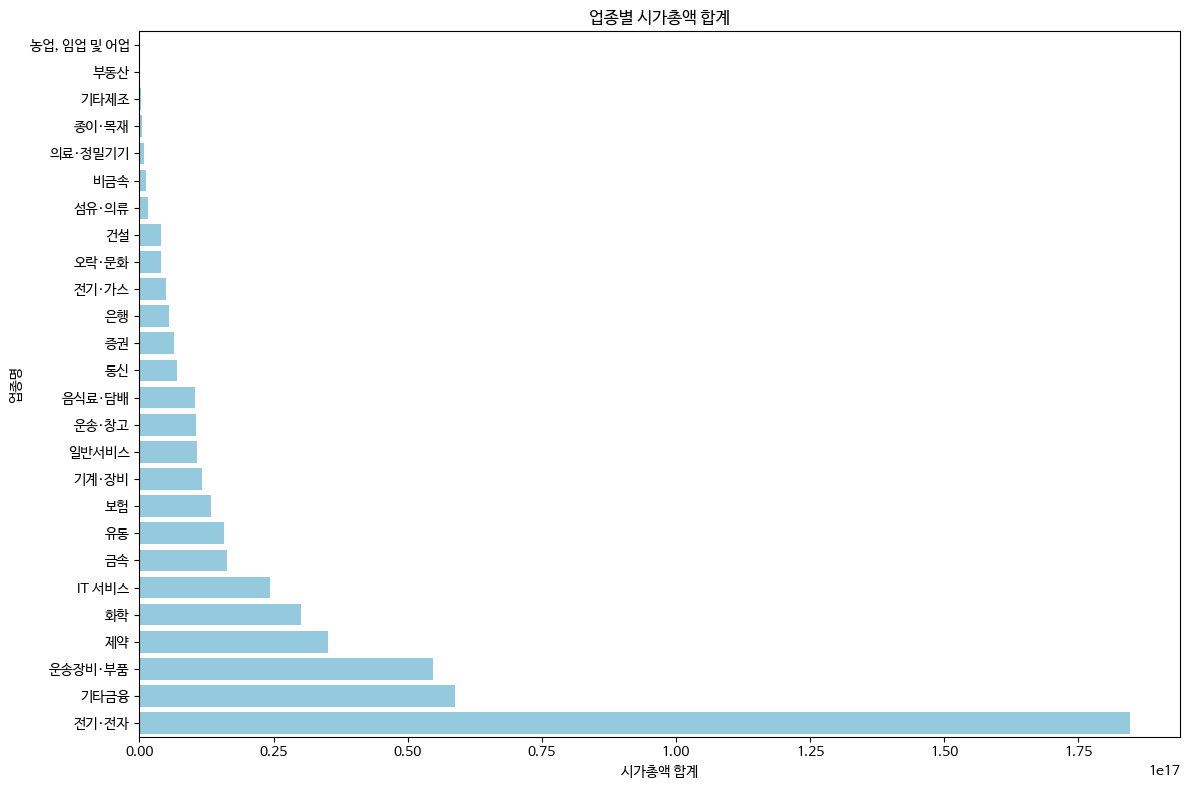

In [ ]:
# 업종별 시가총액 합 시각화
# 어떤 업종이 시가총액이 높은지 확인
# 업종별 시가총액 합계 계산

grouped = (
    scaled_df.groupby('업종명')['시가총액']
    .sum()
    .sort_values(ascending=True)
    .reset_index())

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='시가총액', y='업종명', color='skyblue')
plt.title('업종별 시가총액 합계')
plt.xlabel('시가총액 합계')
plt.ylabel('업종명')
plt.tight_layout()
plt.show()

위 플롯을 보게 되면 업종별 시가총액의 합을 확인할 수 있다. 전기전자 섹터의 시가총액 합이 압도적으로 높은 것을 알 수 있다.

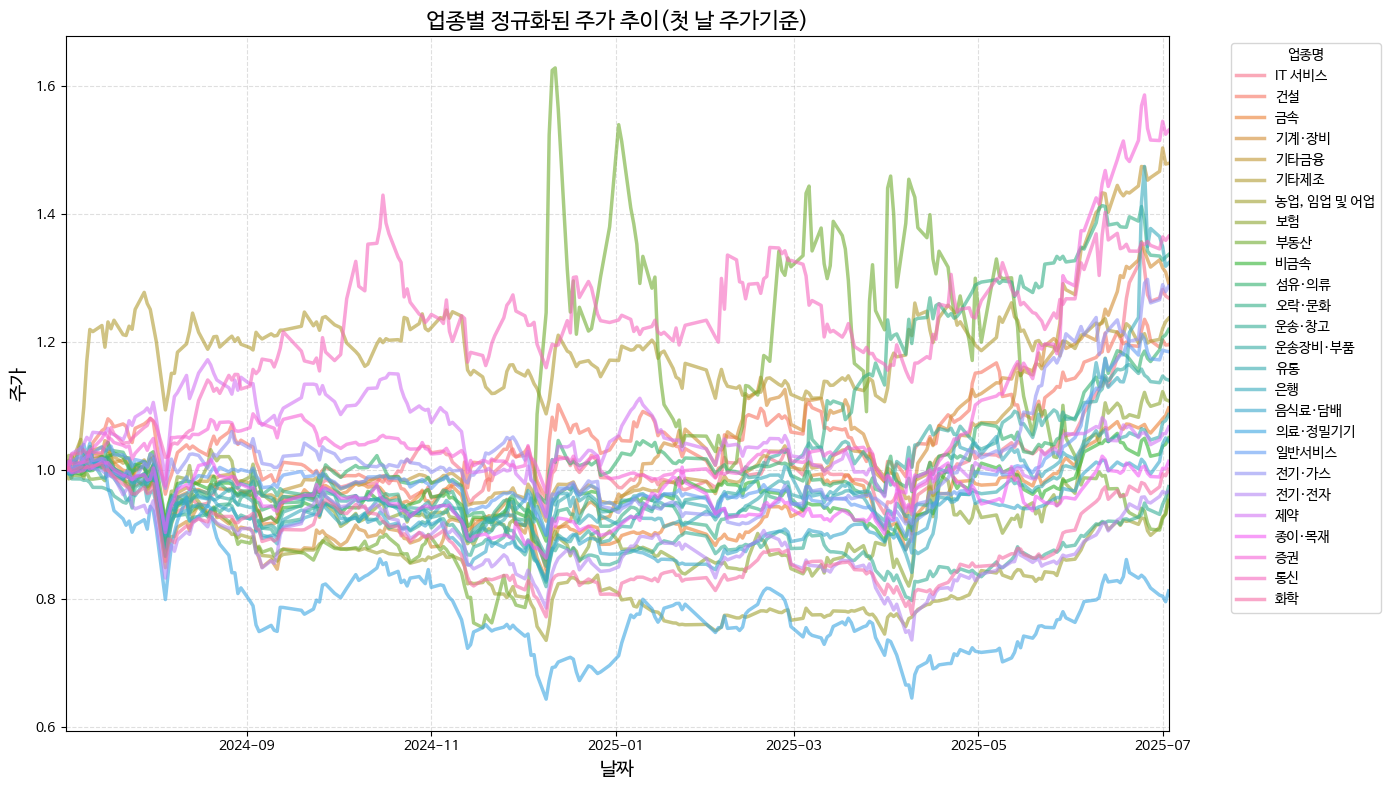

In [ ]:
# 각 티커별로 첫 날의 주가를 1로 기준화해 정규화
# 각 티커의 첫 번째 가격을 찾음
first_day_prices = df.groupby('종목명')['종가'].transform('first')

# 정규화된 종가 계산 (첫 날 가격이 0인 경우를 방지)
# 첫 날 가격이 0이 아니라면 (현재 종가/ 첫 날 종가)
# 첫 날 가격이 0이라면 (그 날의 종가가 0이라면 0, 아니면 NaN 처리될 수 있다. 주가의 경우 0인 경우가 거의 없다)
df['종가_normalized_to_first_day'] = df.apply(
    lambda row: row['종가'] / first_day_prices[row.name]
    if first_day_prices[row.name] != 0 else 0,
    axis=1
)

# 업종명과 날짜별로 그룹화해 정규화된 종가의 평균 계산
grouped_normalized = df.groupby(['업종명', '날짜'])['종가_normalized_to_first_day'].mean().reset_index()

# 시각화(Line Plot)
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_normalized,
    x='날짜',
    y='종가_normalized_to_first_day',
    hue='업종명',
    #marker='o',
    linewidth=2.5,
    alpha=0.6
)

min_date = df['날짜'].min()
max_date = df['날짜'].max()
plt.xlim(min_date, max_date)

plt.title('업종별 정규화된 주가 추이(첫 날 주가기준)', fontsize=16)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('주가', fontsize=14)
plt.legend(title='업종명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

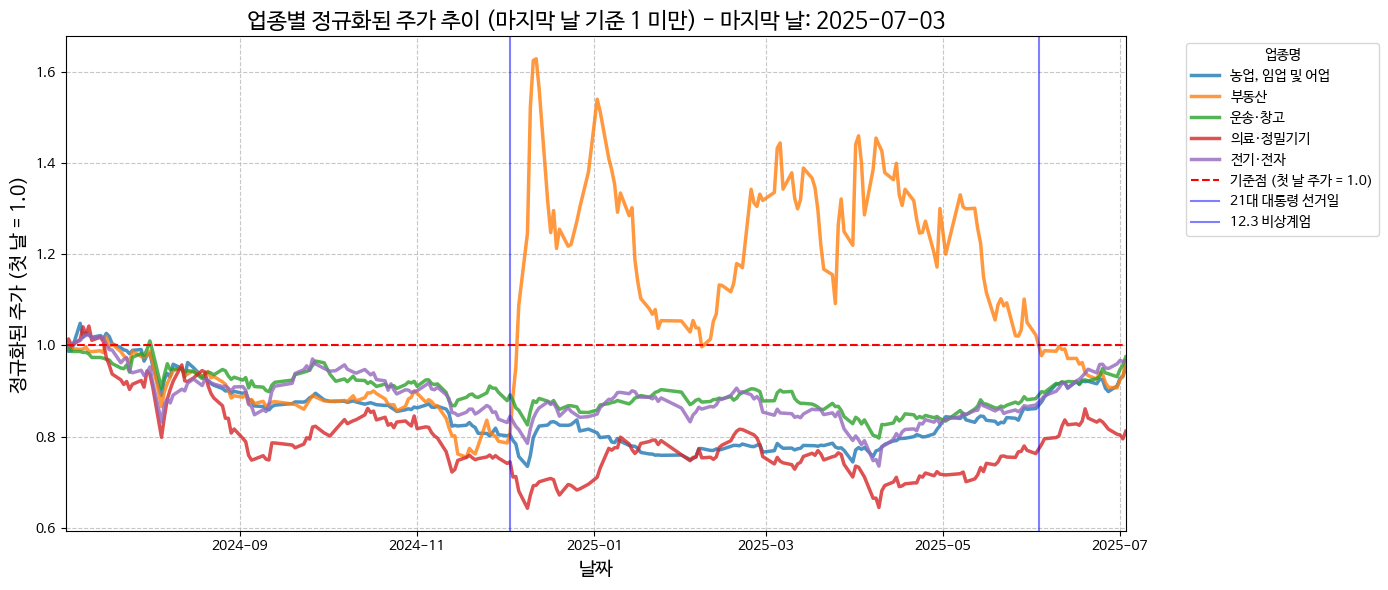

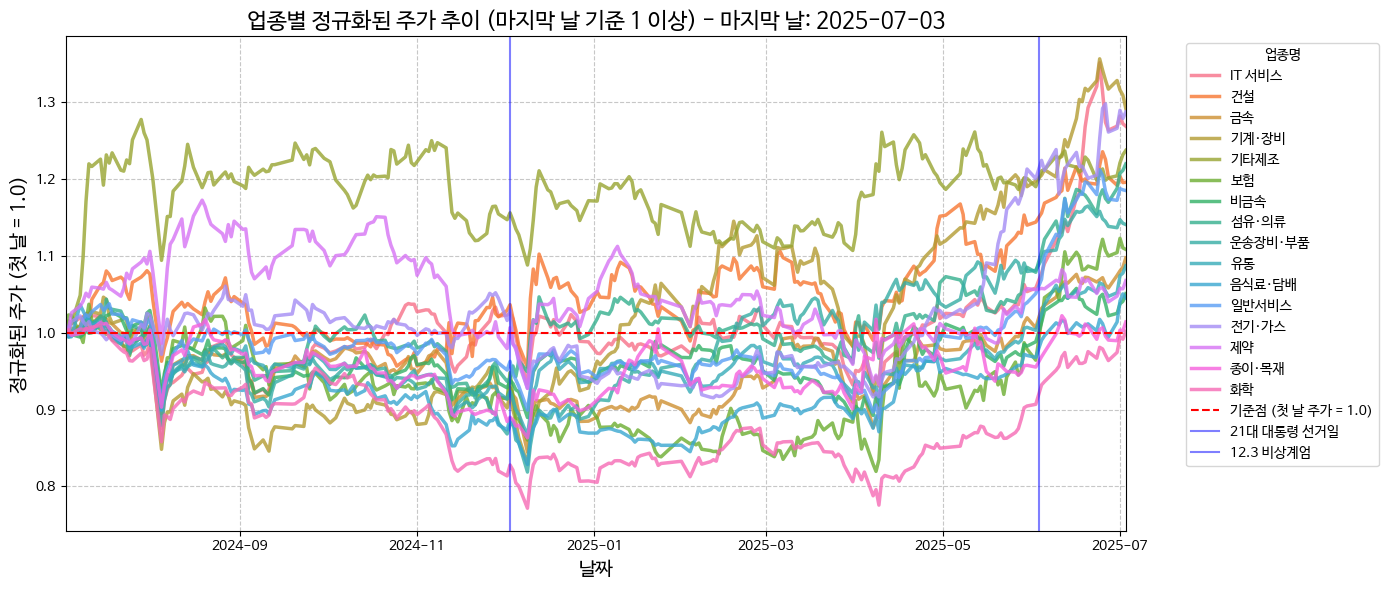

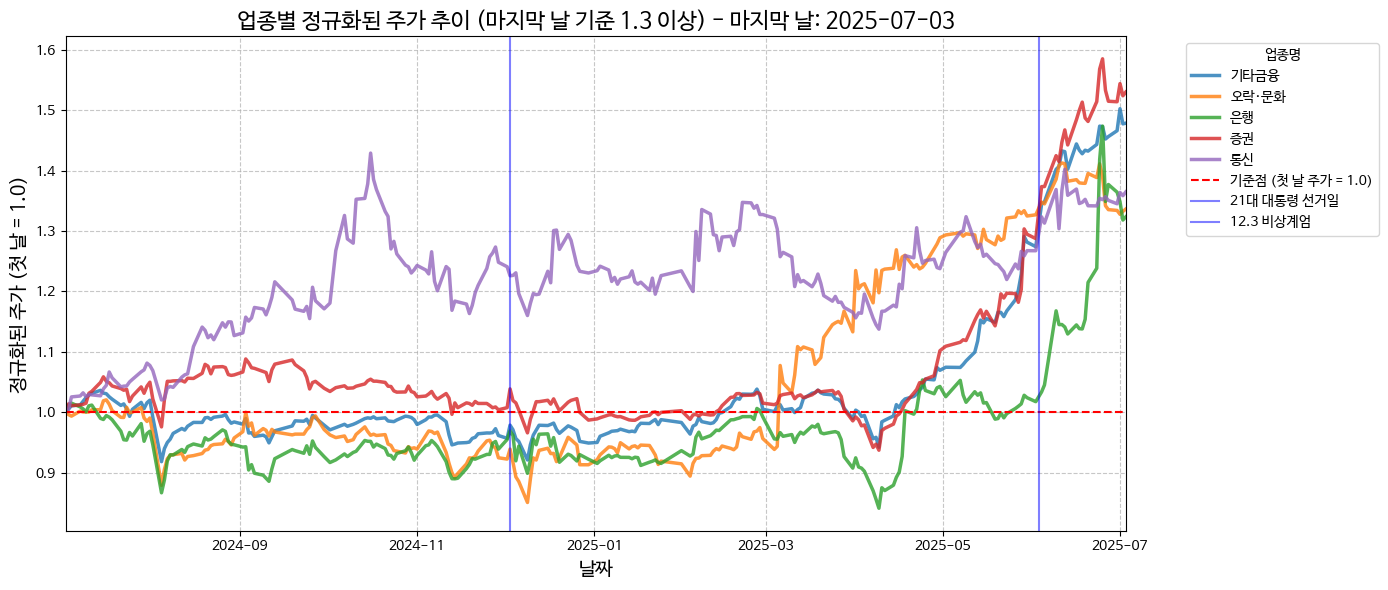

In [ ]:
last_day_performance = grouped_normalized[grouped_normalized['날짜'] == max_date]

sectors_below_1 = last_day_performance[
    last_day_performance['종가_normalized_to_first_day'] < 1
]['업종명'].tolist()

sectors_above_or_equal_1 = last_day_performance[
    (last_day_performance['종가_normalized_to_first_day'] >= 1) &
    (last_day_performance['종가_normalized_to_first_day'] < 1.3)
]['업종명'].tolist()

sectors_above_1point2 = last_day_performance[
    last_day_performance['종가_normalized_to_first_day'] >= 1.3
]['업종명'].tolist()


df_below_1 = grouped_normalized[grouped_normalized['업종명'].isin(sectors_below_1)]
df_above_or_equal_1 = grouped_normalized[grouped_normalized['업종명'].isin(sectors_above_or_equal_1)]
df_above_1point2 = grouped_normalized[grouped_normalized['업종명'].isin(sectors_above_1point2)]


# 공통 날짜 범위 설정 (두 그래프의 x축을 동일하게 유지)
common_min_date = grouped_normalized['날짜'].min()
common_max_date = grouped_normalized['날짜'].max()

if not df_below_1.empty:
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_below_1,
        x='날짜',
        y='종가_normalized_to_first_day',
        hue='업종명',
        #marker='o',
        linewidth=2.5,
        alpha=0.8
    )
    plt.xlim(common_min_date, common_max_date) # 공통 날짜 범위 적용
    plt.axhline(y=1, color='red', linestyle='--', label='기준점 (첫 날 주가 = 1.0)') # 기준선 추가
    plt.axvline(x=pd.to_datetime('2025-06-03'), color='blue', linestyle='-', label='21대 대통령 선거일', alpha=0.5)
    plt.axvline(x=pd.to_datetime('2024-12-03'), color='blue', linestyle='-', label='12.3 비상계엄', alpha=0.5)
    plt.title(f'업종별 정규화된 주가 추이 (마지막 날 기준 1 미만) - 마지막 날: {max_date.strftime("%Y-%m-%d")}', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('정규화된 주가 (첫 날 = 1.0)', fontsize=14)
    plt.legend(title='업종명', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\n마지막 날 기준 1 미만인 섹터가 없습니다.")

# 6. 시각화 2: 마지막 날 기준 1 이상인 섹터
if not df_above_or_equal_1.empty:
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_above_or_equal_1,
        x='날짜',
        y='종가_normalized_to_first_day',
        hue='업종명',
        #marker='o',
        linewidth=2.5,
        alpha=0.8
    )
    plt.xlim(common_min_date, common_max_date) # 공통 날짜 범위 적용
    plt.axhline(y=1, color='red', linestyle='--', label='기준점 (첫 날 주가 = 1.0)') # 기준선 추가
    plt.axvline(x=pd.to_datetime('2025-06-03'), color='blue', linestyle='-', label='21대 대통령 선거일', alpha=0.5)
    plt.axvline(x=pd.to_datetime('2024-12-03'), color='blue', linestyle='-', label='12.3 비상계엄', alpha=0.5)
    plt.title(f'업종별 정규화된 주가 추이 (마지막 날 기준 1 이상) - 마지막 날: {max_date.strftime("%Y-%m-%d")}', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('정규화된 주가 (첫 날 = 1.0)', fontsize=14)
    plt.legend(title='업종명', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\n마지막 날 기준 1 이상인 섹터가 없습니다.")

if not df_above_1point2.empty:
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_above_1point2,
        x='날짜',
        y='종가_normalized_to_first_day',
        hue='업종명',
        #marker='o',
        linewidth=2.5,
        alpha=0.8
    )
    plt.xlim(common_min_date, common_max_date) # 공통 날짜 범위 적용
    plt.axhline(y=1, color='red', linestyle='--', label='기준점 (첫 날 주가 = 1.0)') # 기준선 추가
    plt.axvline(x=pd.to_datetime('2025-06-03'), color='blue', linestyle='-', label='21대 대통령 선거일', alpha=0.5)
    plt.axvline(x=pd.to_datetime('2024-12-03'), color='blue', linestyle='-', label='12.3 비상계엄', alpha=0.5)
    plt.title(f'업종별 정규화된 주가 추이 (마지막 날 기준 1.3 이상) - 마지막 날: {max_date.strftime("%Y-%m-%d")}', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('정규화된 주가 (첫 날 = 1.0)', fontsize=14)
    plt.legend(title='업종명', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\n마지막 날 기준 1 이상인 섹터가 없습니다.")